In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
import random
from itertools import chain

plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jul21_ntuple/*.root")




In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
hists = {}

hists["klong_truth"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_L$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["klong_truth_15"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_L$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["klong_truth_30"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_L$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["klong_truth_50"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_L$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["klong_truth_75"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_L$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )


hists["kshort_truth"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["kshort_truth_15"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["kshort_truth_30"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["kshort_truth_50"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["kshort_truth_75"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )

hists["klong_purple"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_L$ Kinetic Energy [MeV]", 7, 0, 3500),
                            )
hists["klong_blue"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_L$ Kinetic Energy [MeV]", 7, 0, 2100),
                            )
hists["klong_green"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_L$ Kinetic Energy [MeV]", 7, 0, 1500),
                            )
hists["klong_yellow"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_L$ Kinetic Energy [MeV]", 7, 0, 1250),
                            )
hists["klong_red"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_L$ Kinetic Energy [MeV]", 7, 0, 750),
                            )

hists["kshort_purple"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Kinetic Energy [MeV]", 7, 0, 3500),
                            )
hists["kshort_blue"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Kinetic Energy [MeV]", 7, 0, 2100),
                            )
hists["kshort_green"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Kinetic Energy [MeV]", 7, 0, 1500),
                            )
hists["kshort_yellow"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Kinetic Energy [MeV]", 7, 0, 1250),
                            )
hists["kshort_red"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Kinetic Energy [MeV]", 7, 0, 750),
                            )
# hists["dau1_ke"] = hist.Hist("Sim Particles",     
#                                 hist.Bin("k", r"Pion Kinetic Energy [MeV]", 40, 0, 3500),
#                             )
# hists["dau1_ke_theta"] = hist.Hist("Sim Particles",     
#                                 hist.Bin("k", r"Pion Kinetic Energy [MeV]", 40, 0, 3500),
#                             )
# hists["dau2_ke"] = hist.Hist("Sim Particles",     
#                                 hist.Bin("k", r"Pion Kinetic Energy [MeV]", 40, 0, 3500),
#                             )
# hists["dau2_ke_theta"] = hist.Hist("Sim Particles",     
#                                 hist.Bin("k", r"Pion Kinetic Energy [MeV]", 40, 0, 3500),
#                             )

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    sim_particle = ldmx_events['Sim_PNParticle']
    sim_particle_n = ldmx_events['n']['Sim_PNParticle']
    
    klong_mask = sim_particle.pdgID == 130
    kshort_mask = sim_particle.pdgID == 310

    hists["klong_truth"].fill(k = flat(sim_particle[klong_mask].kine),
                              e = flat(sim_particle[klong_mask].electrone),
                              )    
    hists["kshort_truth"].fill(k = flat(sim_particle[kshort_mask].kine),
                               e = flat(sim_particle[kshort_mask].electrone),
                              )    
    
    
    #percent masks for less than 40 degrees  
    mask_test = (-1*sim_particle[kshort_mask].kine+1170) <= sim_particle[kshort_mask].electrone
    
    maskl_15 = (-1*sim_particle[klong_mask].kine+2100) <= sim_particle[klong_mask].electrone
    maskl_30 = (-1*sim_particle[klong_mask].kine+1550) <= sim_particle[klong_mask].electrone
    maskl_50 = (-1*sim_particle[klong_mask].kine+1170) <= sim_particle[klong_mask].electrone
    maskl_75 = (-1*sim_particle[klong_mask].kine+720) <= sim_particle[klong_mask].electrone
    
    numberl_100= flat(flat(sim_particle[klong_mask].e).shape)
    numberl_75 = flat(flat(sim_particle[klong_mask][maskl_75].e).shape)
    numberl_50 = flat(flat(sim_particle[klong_mask][maskl_50].e).shape)
    numberl_30 = flat(flat(sim_particle[klong_mask][maskl_30].e).shape)
    numberl_15 = flat(flat(sim_particle[klong_mask][maskl_15].e).shape)
    
    masks_15 = (-1*sim_particle[kshort_mask].kine+2100) <= sim_particle[kshort_mask].electrone
    masks_30 = (-1*sim_particle[kshort_mask].kine+1550) <= sim_particle[kshort_mask].electrone
    masks_50 = (-1*sim_particle[kshort_mask].kine+1170) <= sim_particle[kshort_mask].electrone
    masks_75 = (-1*sim_particle[kshort_mask].kine+720)  <= sim_particle[kshort_mask].electrone
    
#     numbers_100= flat(flat(sim_particle[kshort_mask].e).shape)
#     numbers_75 = flat(flat(sim_particle[kshort_mask][masks_75].e).shape)
#     numbers_50 = flat(flat(sim_particle[kshort_mask][masks_50].e).shape)
#     numbers_30 = flat(flat(sim_particle[kshort_mask][masks_30].e).shape)
#     numbers_15 = flat(flat(sim_particle[kshort_mask][masks_15].e).shape)
    
    
    
    acceptance_d = flat(flat(sim_particle[kshort_mask][mask_test].kine).shape)
    acceptance_n = flat(flat(sim_particle[kshort_mask].kine).shape)
    acceptance = flat(acceptance_d / acceptance_n)
#    print(acceptance_d)
#    print(acceptance_n)
#    print(acceptance)
    
    #fill histograms
    hists["klong_truth_15"].fill(
                                 k = flat(sim_particle[klong_mask][maskl_15].kine),
                                 e = flat(sim_particle[klong_mask][maskl_15].electrone),
                                )
    hists["klong_truth_30"].fill(
                                  k = flat(sim_particle[klong_mask][maskl_30].kine),
                                  e = flat(sim_particle[klong_mask][maskl_30].electrone),
                                 )
    hists["klong_truth_50"].fill(
                                 k = flat(sim_particle[klong_mask][maskl_50].kine),
                                 e = flat(sim_particle[klong_mask][maskl_50].electrone),
                                )
    hists["klong_truth_75"].fill(
                                 k = flat(sim_particle[klong_mask][maskl_75].kine),
                                 e = flat(sim_particle[klong_mask][maskl_75].electrone),
                                )
    maskl_15_up = (-1*sim_particle[klong_mask].kine+2100) >= sim_particle[klong_mask].electrone
    maskl_30_up = (-1*sim_particle[klong_mask].kine+1550) >= sim_particle[klong_mask].electrone
    maskl_50_up = (-1*sim_particle[klong_mask].kine+1170) >= sim_particle[klong_mask].electrone
    maskl_75_up = (-1*sim_particle[klong_mask].kine+720) >= sim_particle[klong_mask].electrone
   
    hists["klong_purple"].fill(e = flat(sim_particle[klong_mask][maskl_15].kine))    
    hists["klong_blue"].fill(e = flat(sim_particle[klong_mask][maskl_30 & maskl_15_up].kine))    
    hists["klong_green"].fill(e = flat(sim_particle[klong_mask][maskl_50 & maskl_30_up].kine))    
    hists["klong_yellow"].fill(e = flat(sim_particle[klong_mask][maskl_75 & maskl_50_up].kine))   
    hists["klong_red"].fill(e = flat(sim_particle[klong_mask][maskl_75_up].kine))    
    
    
    hists["kshort_truth_15"].fill(
                                 k = flat(sim_particle[kshort_mask][masks_15].kine),
                                 e = flat(sim_particle[kshort_mask][masks_15].electrone),
                                )
    hists["kshort_truth_30"].fill(
                                 k = flat(sim_particle[kshort_mask][masks_30].kine),
                                 e = flat(sim_particle[kshort_mask][masks_30].electrone),
                                )
    hists["kshort_truth_50"].fill(
                                 k = flat(sim_particle[kshort_mask][masks_50].kine),
                                 e = flat(sim_particle[kshort_mask][masks_50].electrone),
                                )
    hists["kshort_truth_75"].fill(
                                 k = flat(sim_particle[kshort_mask][masks_75].kine),
                                 e = flat(sim_particle[kshort_mask][masks_75].electrone),
                                )
    
    
    masks_15_up = (-1*sim_particle[kshort_mask].kine+2100) >= sim_particle[kshort_mask].electrone
    masks_30_up = (-1*sim_particle[kshort_mask].kine+1550) >= sim_particle[kshort_mask].electrone
    masks_50_up = (-1*sim_particle[kshort_mask].kine+1170) >= sim_particle[kshort_mask].electrone
    masks_75_up = (-1*sim_particle[kshort_mask].kine+720)  >= sim_particle[kshort_mask].electrone
   
    hists["kshort_purple"].fill(e = flat(sim_particle[kshort_mask][masks_15].kine))    
    hists["kshort_blue"].fill(e = flat(sim_particle[kshort_mask][masks_30 & masks_15_up].kine))    
    hists["kshort_green"].fill(e = flat(sim_particle[kshort_mask][masks_50 & masks_30_up].kine))    
    hists["kshort_yellow"].fill(e = flat(sim_particle[kshort_mask][masks_75 & masks_50_up].kine))   
    hists["kshort_red"].fill(e = flat(sim_particle[kshort_mask][masks_75_up].kine))    
    
    
    
    
    
    return acceptance, numberl_100, numberl_75, numberl_50, numberl_30, numberl_15

In [6]:
nchunk = 0
percent = 0

ltotal_100 = 0
ltotal_75 = 0
ltotal_50 = 0
ltotal_30 = 0
ltotal_15 = 0

for chunk in ldmx_dict:
    nchunk += 1
    print('process', nchunk) 
    returna = ProcessChunk(chunk, hists)
    ltotal_100 += returna[1]
    ltotal_75 += returna[2]
    ltotal_50 += returna[3]
    ltotal_30 += returna[4]
    ltotal_15 += returna[5]
    percent += 100*returna[0]
    print('percent', percent/nchunk, '%')
    print()
print("Total :", ltotal_100)
print("Top 75% :", ltotal_75)
print("Top 50% :", ltotal_50)
print("Top 30% :", ltotal_30)
print("Top 15% :", ltotal_15)

process 1
percent [53.25581395] %

process 2
percent [51.62790698] %

process 3
percent [51.89932445] %

process 4
percent [50.9437241] %

process 5
percent [51.07128099] %

process 6
percent [50.95869722] %

process 7
percent [50.85933446] %

process 8
percent [50.75191765] %

process 9
percent [50.53983654] %

process 10
percent [50.33356862] %

process 11
percent [50.14895984] %

process 12
percent [50.27621133] %

process 13
percent [50.64151243] %

process 14
percent [50.82288022] %

process 15
percent [50.63665865] %

process 16
percent [50.57988379] %

process 17
percent [50.35775257] %

process 18
percent [50.37358151] %

process 19
percent [50.24272585] %

process 20
percent [50.289275] %

process 21
percent [50.28740476] %

process 22
percent [50.23937587] %

process 23
percent [50.22896823] %

process 24
percent [50.27074151] %

process 25
percent [50.1738359] %

process 26
percent [50.04637696] %

process 27
percent [50.00627895] %

process 28
percent [49.90387486] %

proce

process 226
percent [50.32394035] %

process 227
percent [50.31374656] %

process 228
percent [50.3184621] %

process 229
percent [50.31707143] %

process 230
percent [50.31796921] %

process 231
percent [50.31495708] %

process 232
percent [50.32607682] %

process 233
percent [50.33309273] %

process 234
percent [50.35354152] %

process 235
percent [50.35359772] %

process 236
percent [50.36642842] %

process 237
percent [50.34131019] %

process 238
percent [50.33661056] %

process 239
percent [50.33151339] %

process 240
percent [50.31841333] %

process 241
percent [50.31659459] %

process 242
percent [50.3091272] %

process 243
percent [50.310584] %

process 244
percent [50.305086] %

process 245
percent [50.29741687] %

process 246
percent [50.30486772] %

process 247
percent [50.31368311] %

process 248
percent [50.32762507] %

process 249
percent [50.32961666] %

process 250
percent [50.34898785] %

process 251
percent [50.33535592] %

process 252
percent [50.33402514] %

process

<Hist (k,e) instance at 0x12ecd5700>


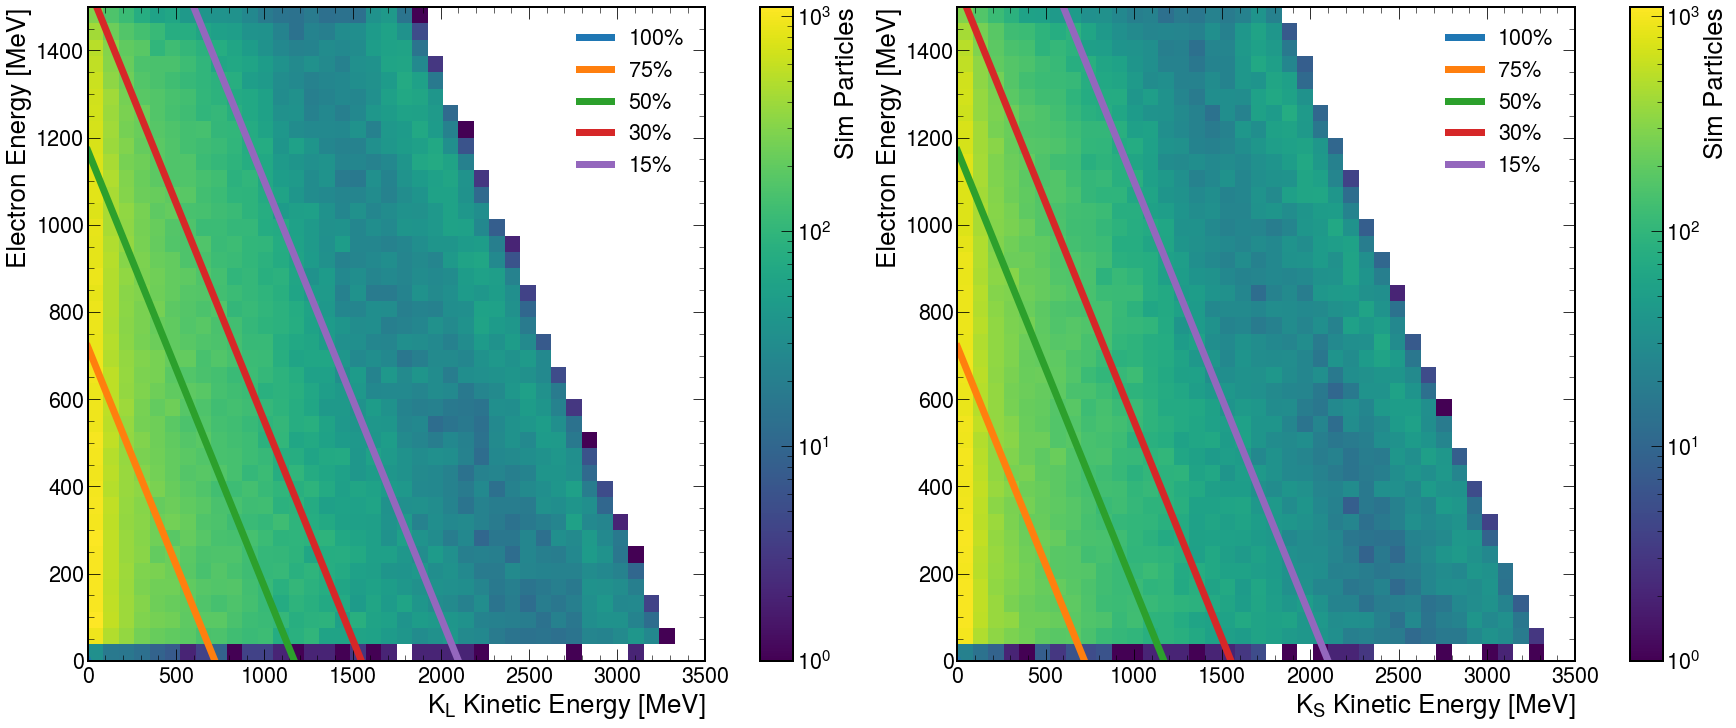

In [7]:
x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x

print(hists["klong_truth"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot2d(hists["klong_truth"], xaxis='k', ax=ax[0], patch_opts=POPTS);
ax[0].set_xlabel(r'$K_L$ Kinetic Energy [MeV]')
ax[0].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[0].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[0].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[0].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[0].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


hist.plot2d(hists["kshort_truth"], xaxis='k', ax=ax[1], patch_opts=POPTS);
ax[1].set_xlabel(r'$K_S$ Kinetic Energy [MeV]')
ax[1].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[1].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[1].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[1].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[1].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


<Hist (k,e) instance at 0x12ecd5700>


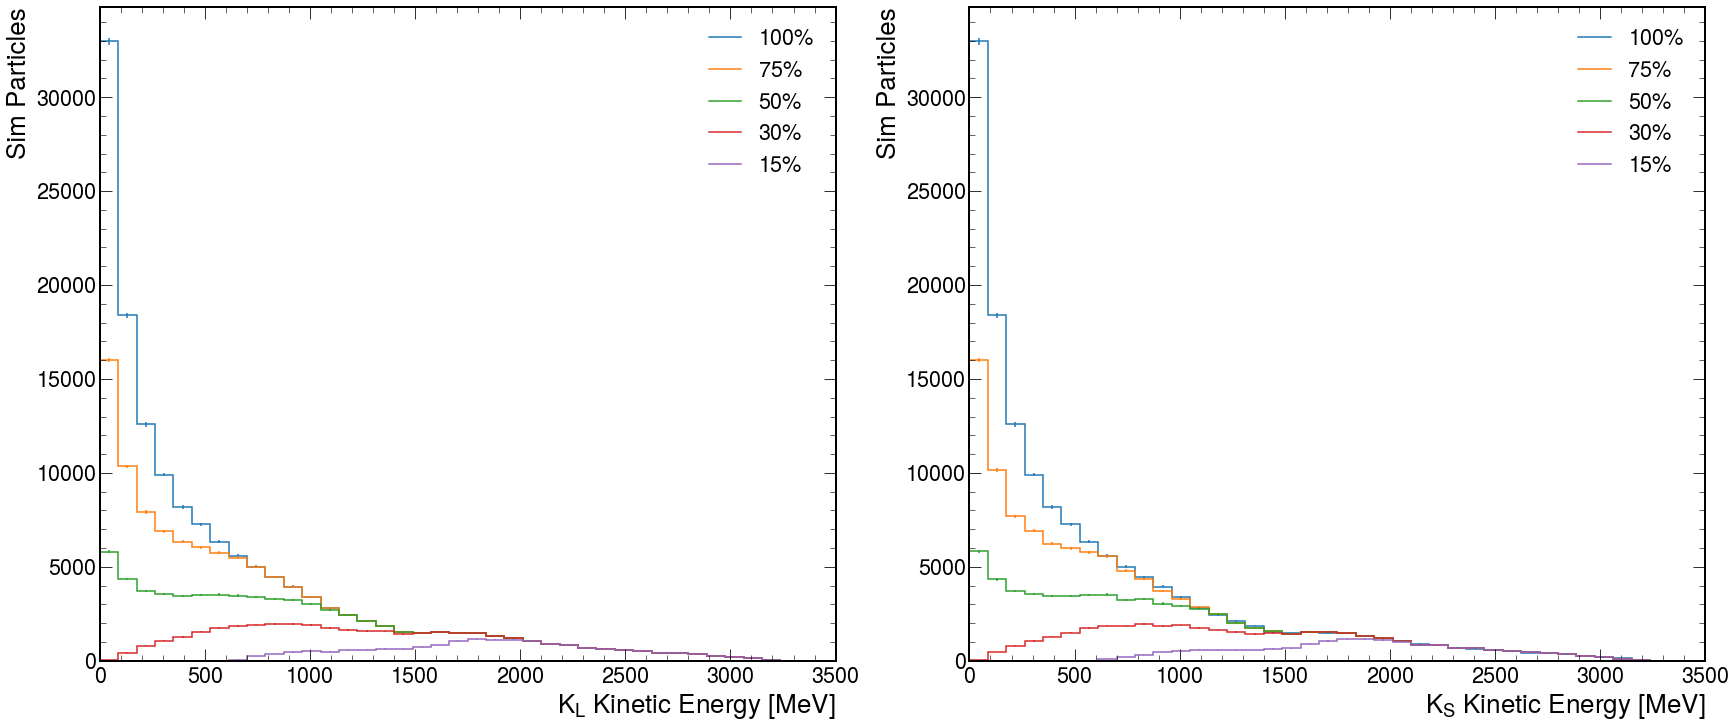

In [8]:
print(hists["klong_truth"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["klong_truth"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["klong_truth_75"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["klong_truth_50"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["klong_truth_30"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["klong_truth_15"].integrate('e'), ax=ax[0], clear = False);
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


hist.plot1d(hists["klong_truth"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["kshort_truth_75"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["kshort_truth_50"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["kshort_truth_30"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["kshort_truth_15"].integrate('e'), ax=ax[1], clear = False);
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])

<Hist (k,e) instance at 0x12ecd5700>
6259


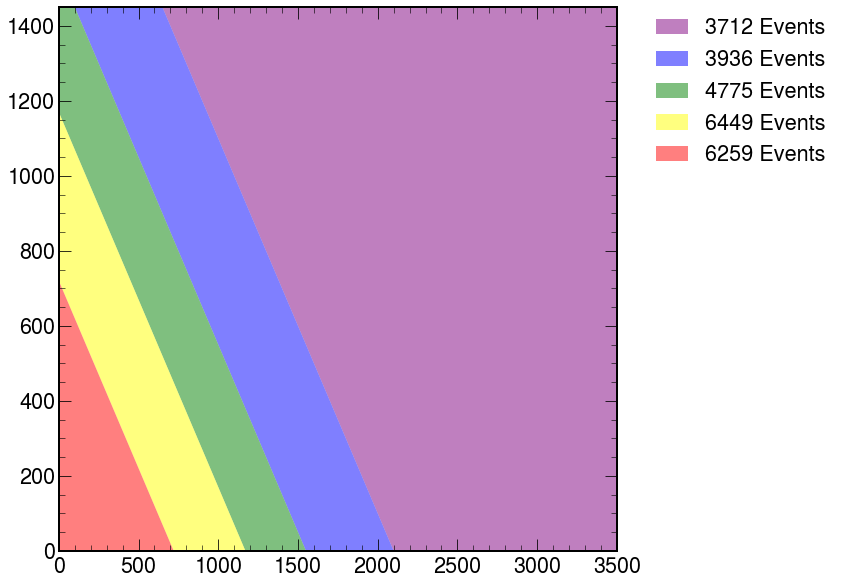

In [25]:
x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x

print(hists["klong_truth"])
fig, ax = plt.subplots()
ax.fill_between(x, line0, line15, where=(line0 > line15), facecolor='purple', alpha=0.5)
ax.fill_between(x, line15, line30, where=(line15 > line30), facecolor='blue', alpha=0.5)
ax.fill_between(x, line30, line50, where=(line30 > line50), facecolor='green', alpha=0.5)
ax.fill_between(x, line50, line75, where=(line50 > line75), facecolor='yellow', alpha=0.5)
ax.fill_between(x, line75, line100, where=(line75 > line100), facecolor='red', alpha=0.5)

ax.set_xlim(0, 3500)
ax.set_ylim(0, 1450)
leg = ax.legend([r'3712 Events ', r'3936 Events', r'4775 Events', r'6449 Events', r'6259 Events' ], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#leg = ax.legend([r'100%', r'75%', r'50%', r'30%', r'15%' ], loc = 'upper right', borderaxespad=0.)

# Total : [25131]
# Top 75% : [18872]
# Top 50% : [12423]
# Top 30% : [7648]
# Top 15% : [3712]

print(25131-18872)

<Hist (e) instance at 0x12ece12e0>


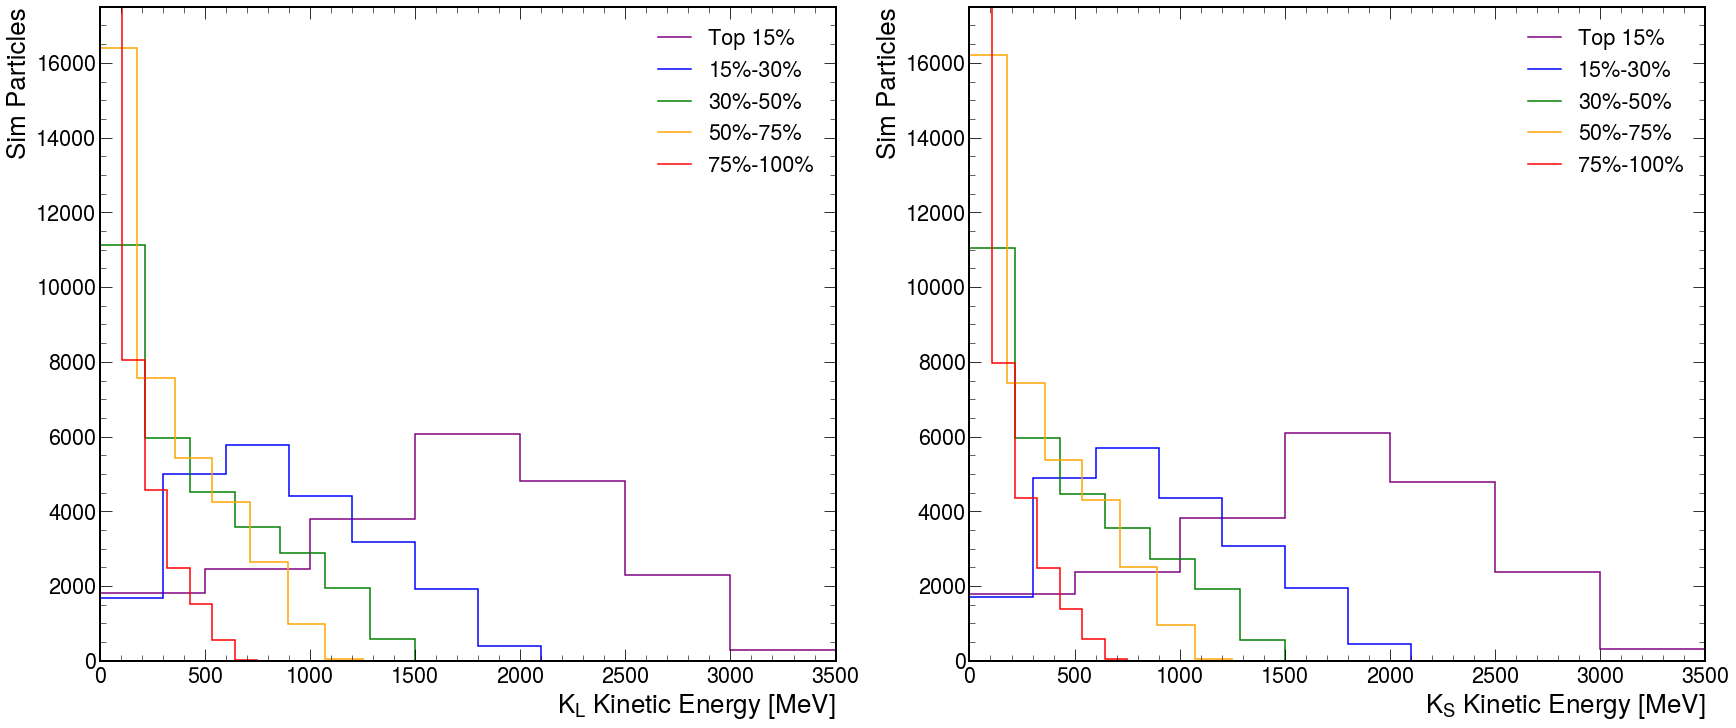

In [10]:
purple_line_opts = {'color': 'purple'}
blue_line_opts = {'color': 'blue'}
green_line_opts = {'color': 'green'}
yellow_line_opts = {'color': 'orange'}
red_line_opts = {'color': 'red'}


print(hists["klong_red"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["klong_purple"], ax=ax[0], line_opts = purple_line_opts, clear = False);
hist.plot1d(hists["klong_blue"], ax=ax[0], line_opts = blue_line_opts, clear = False);
hist.plot1d(hists["klong_green"], ax=ax[0], line_opts = green_line_opts, clear = False);
hist.plot1d(hists["klong_yellow"], ax=ax[0], line_opts = yellow_line_opts, clear = False);
hist.plot1d(hists["klong_red"], ax=ax[0], line_opts = red_line_opts, clear = False);

ax[0].set_ylim(0, 17500)
leg = ax[0].legend([r'Top 15%', r'15%-30%', r'30%-50%', r'50%-75%', r'75%-100%' ])

hist.plot1d(hists["kshort_purple"], ax=ax[1], line_opts = purple_line_opts, clear = False);
hist.plot1d(hists["kshort_blue"], ax=ax[1], line_opts = blue_line_opts, clear = False);
hist.plot1d(hists["kshort_green"], ax=ax[1], line_opts = green_line_opts, clear = False);
hist.plot1d(hists["kshort_yellow"], ax=ax[1], line_opts = yellow_line_opts, clear = False);
hist.plot1d(hists["kshort_red"], ax=ax[1], line_opts = red_line_opts, clear = False);

ax[1].set_ylim(0, 17500)
leg = ax[1].legend([r'Top 15%', r'15%-30%', r'30%-50%', r'50%-75%', r'75%-100%' ])




<Hist (e) instance at 0x10b524070>
<Hist (e) instance at 0x10b5247f0>
<Hist (e) instance at 0x10b524640>
<Hist (e) instance at 0x10b524430>
<Hist (e) instance at 0x12ece12e0>


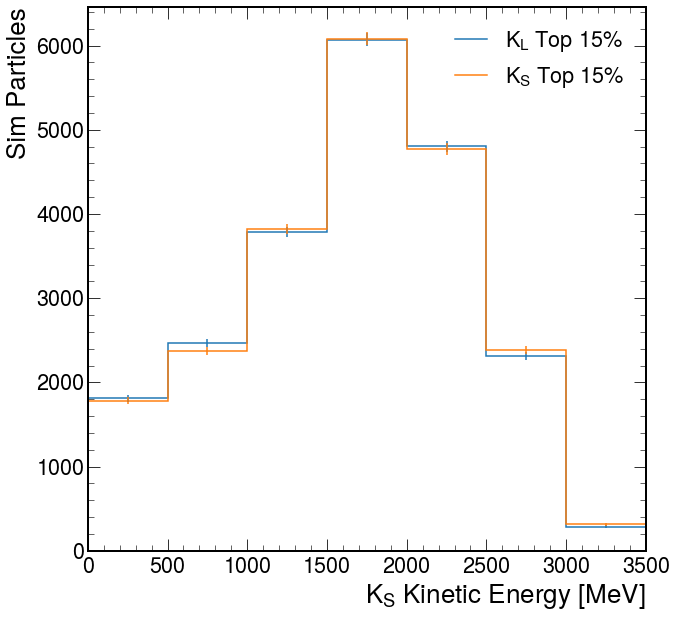

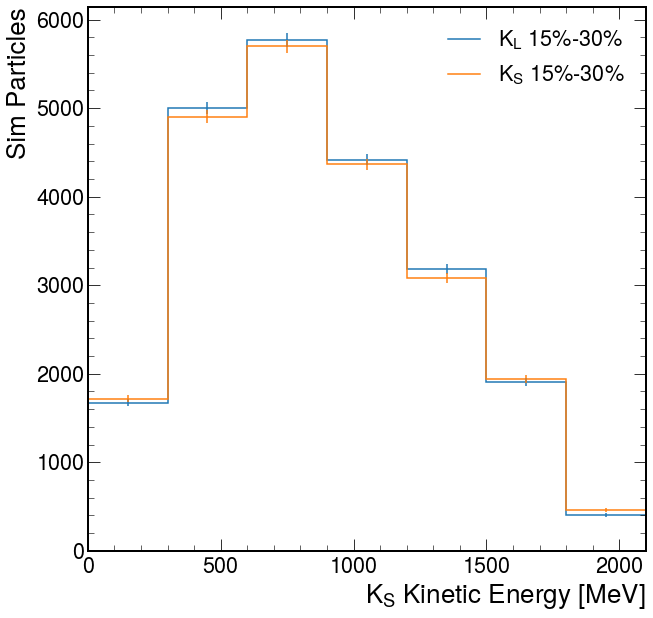

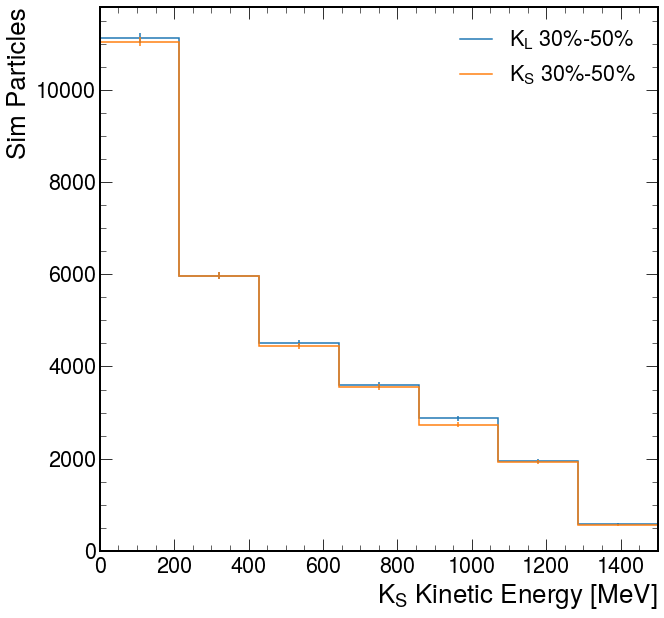

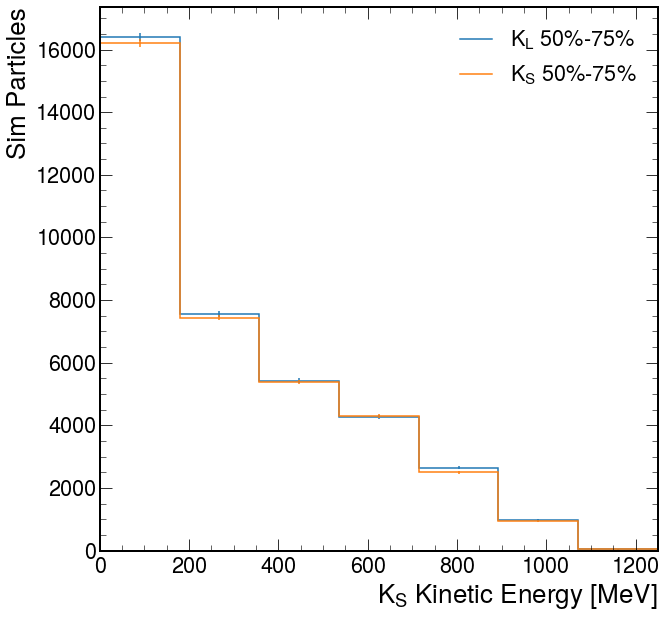

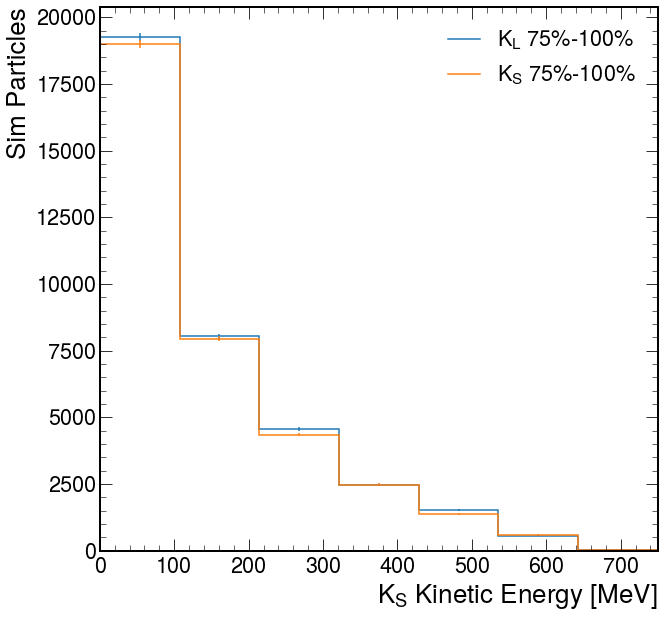

In [11]:
purple_line_opts = {'color': 'purple'}
blue_line_opts = {'color': 'blue'}
green_line_opts = {'color': 'green'}
yellow_line_opts = {'color': 'orange'}
red_line_opts = {'color': 'red'}


print(hists["klong_purple"])
fig, ax = plt.subplots()
hist.plot1d(hists["klong_purple"], ax=ax, clear = False);
hist.plot1d(hists["kshort_purple"], ax=ax, clear = False);
leg = ax.legend([r'$K_L$ Top 15%',r'$K_S$ Top 15%', ])

print(hists["klong_blue"])
fig, ax = plt.subplots()
hist.plot1d(hists["klong_blue"], ax=ax, clear = False);
hist.plot1d(hists["kshort_blue"], ax=ax, clear = False);
leg = ax.legend([r'$K_L$ 15%-30%',r'$K_S$ 15%-30%', ])

print(hists["klong_green"])
fig, ax = plt.subplots()
hist.plot1d(hists["klong_green"], ax=ax, clear = False);
hist.plot1d(hists["kshort_green"], ax=ax, clear = False);
leg = ax.legend([r'$K_L$ 30%-50%',r'$K_S$ 30%-50%', ])

print(hists["klong_yellow"])
fig, ax = plt.subplots()
hist.plot1d(hists["klong_yellow"], ax=ax, clear = False);
hist.plot1d(hists["kshort_yellow"], ax=ax, clear = False);
leg = ax.legend([r'$K_L$ 50%-75%',r'$K_S$ 50%-75%', ])


print(hists["klong_red"])
fig, ax = plt.subplots()
hist.plot1d(hists["klong_red"], ax=ax, clear = False);
hist.plot1d(hists["kshort_red"], ax=ax, clear = False);
leg = ax.legend([r'$K_L$ 75%-100%',r'$K_S$ 75%-100%', ])



Text(1, 0, 'Kaon Kinetic Energy [MeV]')

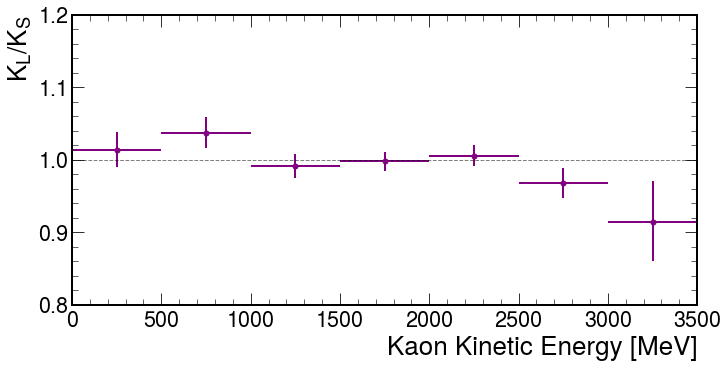

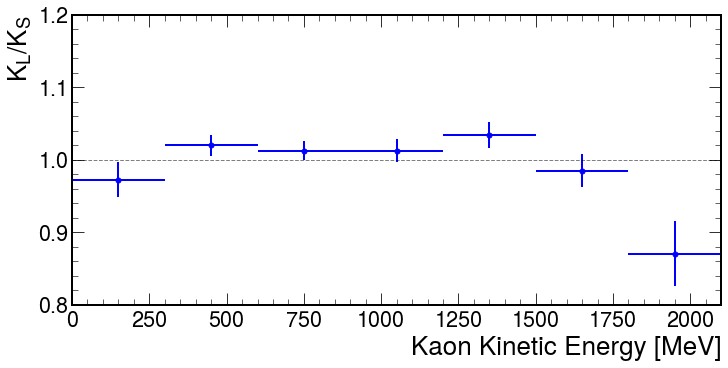

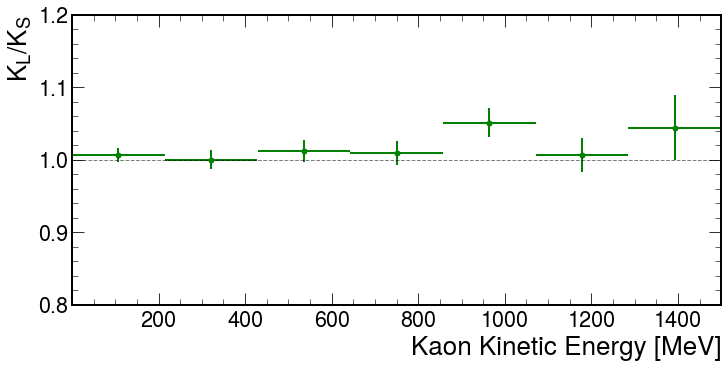

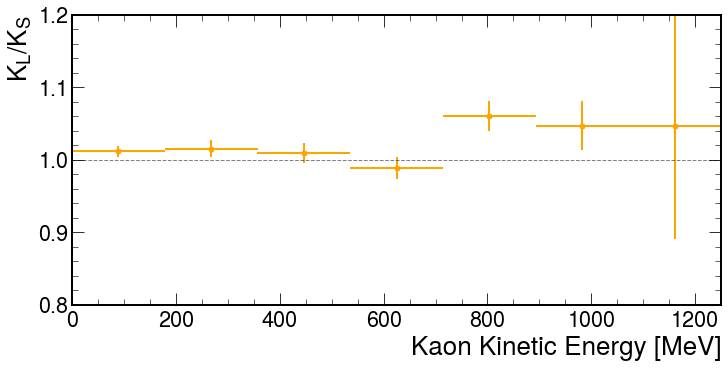

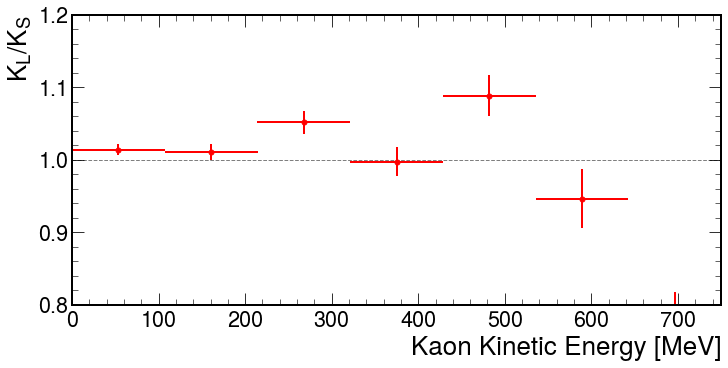

In [12]:
numerator_purple = hists["klong_purple"]
denominator_purple = hists["kshort_purple"]
purple_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'purple','elinewidth': 2,'xerr': 250}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_purple, denom=denominator_purple,ax=ax, error_opts=purple_opts,guide_opts={},unc='num')
ax.set_ylabel('$K_L$/$K_S$')
ax.set_ylim(0.8,1.2)
ax.set_xlabel('Kaon Kinetic Energy [MeV]')

numerator_blue = hists["klong_blue"]
denominator_blue = hists["kshort_blue"]
blue_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'blue','elinewidth': 2,'xerr': 150}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_blue, denom=denominator_blue,ax=ax, error_opts=blue_opts,guide_opts={},unc='num')
ax.set_ylabel('$K_L$/$K_S$')
ax.set_ylim(0.8,1.2)
ax.set_xlabel('Kaon Kinetic Energy [MeV]')

numerator_green = hists["klong_green"]
denominator_green = hists["kshort_green"]
green_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'green','elinewidth': 2,'xerr': 107.1}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_green, denom=denominator_green,ax=ax, error_opts=green_opts,guide_opts={},unc='num')
ax.set_ylabel('$K_L$/$K_S$')
ax.set_ylim(0.8,1.2)
ax.set_xlabel('Kaon Kinetic Energy [MeV]')

numerator_yellow = hists["klong_yellow"]
denominator_yellow = hists["kshort_yellow"]
yellow_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'orange','elinewidth': 2,'xerr': 89.3}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_yellow, denom=denominator_yellow,ax=ax, error_opts=yellow_opts,guide_opts={},unc='num')
ax.set_ylabel('$K_L$/$K_S$')
ax.set_ylim(0.8,1.2)
ax.set_xlabel('Kaon Kinetic Energy [MeV]')

numerator_red = hists["klong_red"]
denominator_red = hists["kshort_red"]
red_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'red','elinewidth': 2,'xerr': 53.6}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_red, denom=denominator_red,ax=ax, error_opts=red_opts,guide_opts={},unc='num')
ax.set_ylabel('$K_L$/$K_S$')
ax.set_ylim(0.8,1.2)
ax.set_xlabel('Kaon Kinetic Energy [MeV]')



Text(1, 0, 'Kaon Kinetic Energy [MeV]')

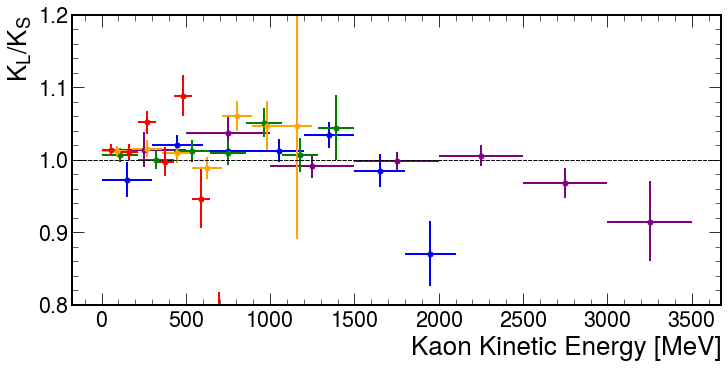

In [15]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_purple, denom=denominator_purple,ax=ax, error_opts=purple_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_blue, denom=denominator_blue,ax=ax, error_opts=blue_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_green, denom=denominator_green,ax=ax, error_opts=green_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_yellow, denom=denominator_yellow,ax=ax, error_opts=yellow_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_red, denom=denominator_red,ax=ax, error_opts=red_opts,guide_opts={},unc='num', clear = False)



ax.set_ylabel('$K_L$/$K_S$')
ax.set_ylim(0.8,1.2)
ax.set_xlabel('Kaon Kinetic Energy [MeV]')



<Hist (k,e) instance at 0x12ecd5700>
6259


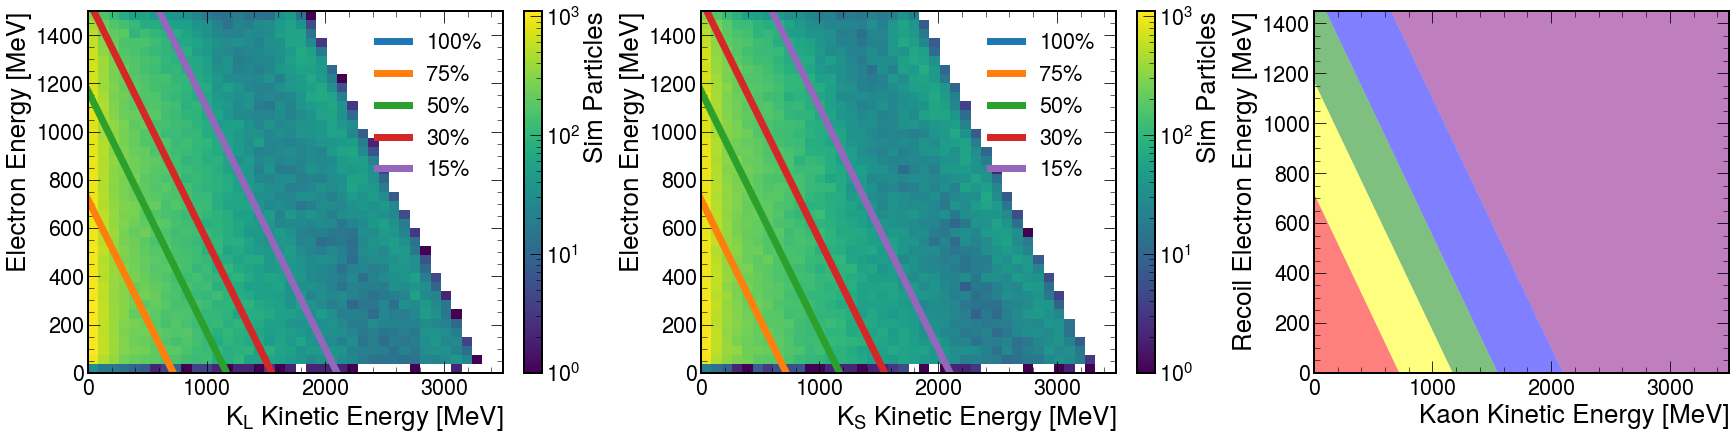

In [21]:
x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x

print(hists["klong_truth"])
fig, ax = plt.subplots(1,3,figsize=(24,6), constrained_layout=True)
hist.plot2d(hists["klong_truth"], xaxis='k', ax=ax[0], patch_opts=POPTS);
ax[0].set_xlabel(r'$K_L$ Kinetic Energy [MeV]')
ax[0].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[0].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[0].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[0].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[0].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


hist.plot2d(hists["kshort_truth"], xaxis='k', ax=ax[1], patch_opts=POPTS);
ax[1].set_xlabel(r'$K_S$ Kinetic Energy [MeV]')
ax[1].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[1].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[1].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[1].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[1].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])

x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x


ax[2].fill_between(x, line0, line15, where=(line0 > line15), facecolor='purple', alpha=0.5)
ax[2].fill_between(x, line15, line30, where=(line15 > line30), facecolor='blue', alpha=0.5)
ax[2].fill_between(x, line30, line50, where=(line30 > line50), facecolor='green', alpha=0.5)
ax[2].fill_between(x, line50, line75, where=(line50 > line75), facecolor='yellow', alpha=0.5)
ax[2].fill_between(x, line75, line100, where=(line75 > line100), facecolor='red', alpha=0.5)

ax[2].set_xlim(0, 3500)
ax[2].set_ylim(0, 1450)
ax[2].set_xlabel(r'Kaon Kinetic Energy [MeV]')
ax[2].set_ylabel(r'Recoil Electron Energy [MeV]')
#leg = ax.legend([r'3712 Events ', r'3936 Events', r'4775 Events', r'6449 Events', r'6259 Events' ], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#leg = ax.legend([r'100%', r'75%', r'50%', r'30%', r'15%' ], loc = 'upper right', borderaxespad=0.)

# Total : [25131]
# Top 75% : [18872]
# Top 50% : [12423]
# Top 30% : [7648]
# Top 15% : [3712]

print(25131-18872)


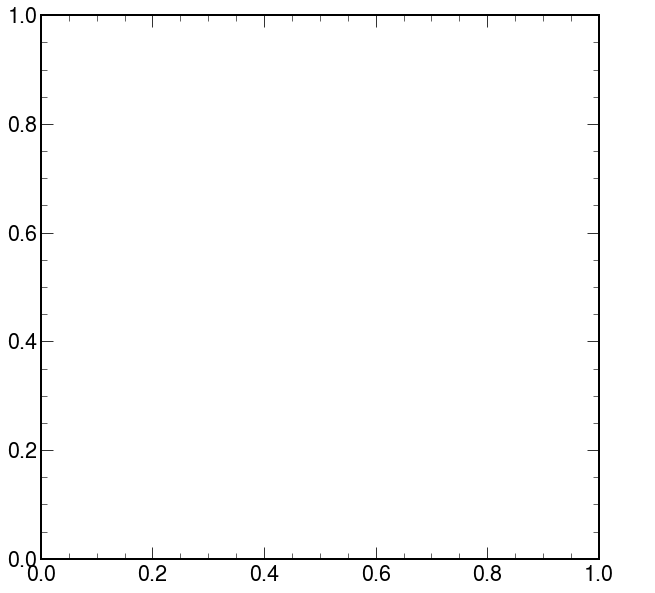

In [24]:
fig, ax = plt.subplots()
leg = ax.legend([r'3712 Events ', r'3936 Events', r'4775 Events', r'6449 Events', r'6259 Events' ], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

